In [16]:
import numpy as np
from nara_wpe import project_root
import soundfile as sf
from nara_wpe import wpe
from nara_wpe.utils import stft
from nara_wpe.utils import istft_loop as istft
from nara_wpe.utils import get_stft_center_frequencies
from tqdm import tqdm
from librosa.core.audio import resample
import IPython
import matplotlib.pyplot as plt

In [6]:
channels = 8
sampling_rate = 16000
stft_size, stft_shift = 512, 128
delay = 3
iterations = 5
K = 10

In [9]:
file_template = 'AMI_WSJ20-Array1-{}_T10c0201.wav'
signal_list = [
    sf.read(str(project_root / 'data' / file_template.format(d + 1)))[0]
    for d in range(channels)
]
signal_list = [resample(x_, 16000, sampling_rate) for x_ in signal_list]
y = np.stack(signal_list, axis=0)

center_frequencies = get_stft_center_frequencies(stft_size, sampling_rate)

Y = stft(y, size=stft_size, shift=stft_shift)

X = np.copy(Y)
D, T, F = Y.shape
for f in tqdm(range(F), total=F):
    X[:, :, f] = wpe.wpe(Y[:, :, f], K=K, delay=delay, iterations=iterations)

x = istft(X, size=stft_size, shift=stft_shift)

100%|██████████| 257/257 [01:33<00:00,  3.08it/s]


In [10]:
y.shape

(8, 127523)

In [11]:
y.shape[1] / sampling_rate

7.9701875

# One of the input channels

In [14]:
IPython.display.Audio(y[0], rate=sampling_rate)

In [17]:
Y.shape

(8, 1000, 257)

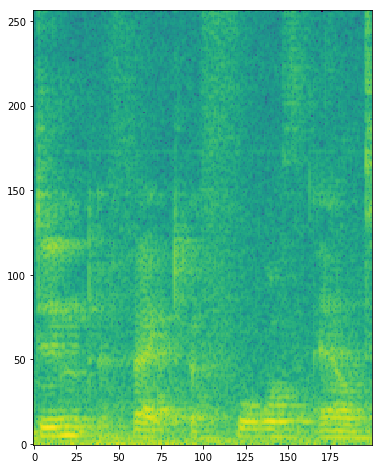

In [28]:
plt.figure(figsize=(20, 8))
plt.imshow(20 * np.log10(np.abs(Y[0, 200:400, :])).T, origin='lower')
plt.show()

# Dereverberated signal

In [15]:
IPython.display.Audio(x[0], rate=sampling_rate)

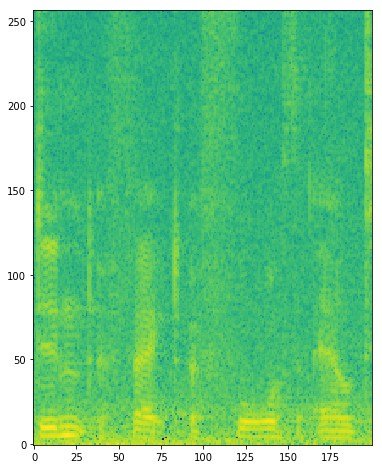

In [30]:
plt.figure(figsize=(20, 8))
plt.imshow(20 * np.log10(np.abs(X[0, 200:400, :])).T, origin='lower')
plt.show()